# Project: Wrangle and Analyze data


## The tasks in this project are as follows:

#### Data wrangling, which consists of:
## Gathering data 
#### there ate 2 files i need to gather data from it, also need to gather additional Data via the Twitter API, but since it takes a lot of time we allowed to read and use the data from json file 
## Assessing data
#### which consist of: Define, Code, Test
## Cleaning data
#### Storing, analyzing, and visualizing the wrangled data

### Reporting 

In [477]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
!pip install tweepy
import tweepy
import json
import re
import os
import requests
import matplotlib.pyplot as plt
%matplotlib inline


## 1- Gathering Data

In [478]:
# Read the csv file
df_twitter_archive = pd.read_csv('twitter-archive-enhanced-2.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [479]:
df_twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [480]:
df_image_predictions = pd.read_csv('image-predictions-3.tsv',sep = '\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [481]:
df_image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [482]:
## just put it as a comment but i don't run it since it take long time to have a developer account in twitter
'''
# twitter API
consumer_key = 'X'
consumer_secret = 'X'
access_token = 'X'
access_secret = 'X'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler = auth,
                 parser = tweepy.parsers.JSONParser(),
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)
'''

"\n# twitter API\nconsumer_key = 'X'\nconsumer_secret = 'X'\naccess_token = 'X'\naccess_secret = 'X'\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth_handler = auth,\n                 parser = tweepy.parsers.JSONParser(),\n                 wait_on_rate_limit = True,\n                 wait_on_rate_limit_notify = True)\n"

In [483]:
# Use Twitter API to collect status data on tweets present in twitter dataframe
tweet_ids = list(df_twitter_archive['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in tweet_ids:
    try:
        
        data = api.get_status(tweet_id, 
                             tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
    except:
        tweet_id_missing.append(tweet_id)
        print(tweet_id)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
882268110199369728
882045870035

701889187134500865
701805642395348998
701601587219795968
701570477911896070
701545186879471618
701214700881756160
700890391244103680
700864154249383937
700847567345688576
700796979434098688
700747788515020802
700518061187723268
700505138482569216
700462010979500032
700167517596164096
700151421916807169
700143752053182464
700062718104104960
700029284593901568
700002074055016451
699801817392291840
699788877217865730
699779630832685056
699775878809702401
699691744225525762
699446877801091073
699434518667751424
699423671849451520
699413908797464576
699370870310113280
699323444782047232
699088579889332224
699079609774645248
699072405256409088
699060279947165696
699036661657767936
698989035503689728
698953797952008193
698907974262222848
698710712454139905
698703483621523456
698635131305795584
698549713696649216
698355670425473025
698342080612007937
698262614669991936
698195409219559425
698178924120031232
697995514407682048
697990423684476929
697943111201378304
697881462549430272
697630435728

In [484]:
#load & download json file
df_json=pd.read_json('tweet_json', lines=True)
df_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [485]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [486]:
df_json.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

## 2- Assessing Data

***Assessing data is the second step in data wrangling. When assessing inspecting dataset for two things: data quality issues (i.e. content issues) and lack of tidiness (i.e. structural issues).***

In [487]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [488]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [489]:
sum(df_twitter_archive.duplicated())

0

In [490]:
df_twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [491]:
df_twitter_archive.loc[(df_twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']]!= 'None').sum(axis=1)>1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


#### There are 23 incorrect value in (rating_denominator) column

In [492]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [493]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [494]:
sum(df_image_predictions['tweet_id'].duplicated())

0

In [495]:
#number of missing ID's in (df_image_predictions)
2356-2075

281

In [496]:
sum(df_image_predictions.jpg_url.duplicated())

66

In [497]:
df_image_predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [498]:
df_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [499]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [500]:
# number of missing ID's
2356 - 2354

2

## Observations
## Quality:
#### 1-  Remove all columns which are have retweets 
#### 2-Delete unnessary columns 
#### 3- There are some dogs have multiple stages, need to add 6 more columns, then add it to dog stages 
#### 4- Some of (doggo , floofer, pupper, puppo) clumns have None value insted of NaN
#### 5- In the (rating_numerator)column data type is not  decimal
#### 6-In visual assessment I realize that in some rows there is a defferent numbers in (rating_denominator) which is an incorrect values, it has to be 10,There are 23 incorrect value in (rating_denominator) column
####  7- The columns (timestamp) and (retweeted_status_timestamp) the data type is not datetime variable
#### 8- p1, p2, and p3 contain underscores instead of spaces
#### 9- There are 66 jpg_url duplicated in (df_image_predictions) shoud be dropped  
#### 10-Change tweet_id from an integer to a string in all dataframes
#### 11-  Rename id in df_json to tweet_id 

## Tidyness:
#### 1-  No need to have 4 columns describe the stages of dogs (doggo , floofer, pupper, puppo)
####  2- No need to have 2 columns ( rating_numerator) and (rating_denominator), we can combine it in one column
#### 3- merge all 3 tabels in one dataset, the common column is (tweet_id)

# 3- Cleaning Data

In [501]:
# Make copies of the dataframes for cleaning

df_twitter_archive_clean= df_twitter_archive.copy()
df_image_predictions_clean= df_image_predictions.copy()
df_json_clean= df_json.copy()

### a) df_twitter_archive

#### (Quality) 1-define: remove all columns which are have retweets and detected by the columns:  Remove retweets by keeping the null rows of retweeted_status_id column.



In [502]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Code

In [503]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_id.isnull()]

In [504]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### TEST

In [505]:
list(df_twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### (Quality) 2-define: Delete unessary columns

### code

In [506]:
df_twitter_archive_clean= df_twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

### TEST

In [507]:
list(df_twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### (Quality): 3- there are some dogs have multiple stages, need to add 6 more columns, then add it to dog stages 

#### CODE

In [508]:
df_twitter_archive_clean['doggofloffer'] = df_twitter_archive_clean['text'].str.extract('(doggo && floofer)')
df_twitter_archive_clean['doggopupper'] = df_twitter_archive_clean['text'].str.extract('(doggo && pupper)')
df_twitter_archive_clean['doggopuppo'] = df_twitter_archive_clean['text'].str.extract('(doggo && puppo)')
df_twitter_archive_clean['flofferpupper'] = df_twitter_archive_clean['text'].str.extract('(floofer&&pupper)')
df_twitter_archive_clean['flofferpuppo'] = df_twitter_archive_clean['text'].str.extract('(floofer && puppo)')
df_twitter_archive_clean['pupperpuppo'] = df_twitter_archive_clean['text'].str.extract('(pupper && puppo)')

In [509]:
df_twitter_archive_clean['dog_stage'] = df_twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo|doggofloffer|doggopupper|doggopuppo|flofferpupper|flofferpuppo|pupperpuppo)')

In [510]:
#check the result of (do_stage) column is correct with other 4 columns 
df_twitter_archive_clean[['dog_stage','doggo', 'floofer', 'pupper', 'puppo','doggofloffer','doggopupper','doggopuppo','flofferpupper','flofferpuppo','pupperpuppo']].sample(20)


,dog_stage,doggo,floofer,pupper,puppo,doggofloffer,doggopupper,doggopuppo,flofferpupper,flofferpuppo,pupperpuppo
452,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1337,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
827,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1688,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1921,pupper,None,None,pupper,None,NaN,NaN,NaN,NaN,NaN,NaN
1749,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
373,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
207,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
187,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
189,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN


#### (Tidiness): 1-  No need to have 4 columns describe the stages of dogs (doggo , floofer, pupper, puppo), also 'doggofloffer','doggopupper','doggopuppo','flofferpupper','flofferpuppo','pupperpuppo' merge it in all one new column called (dog_stage)


In [511]:
df_twitter_archive_clean= df_twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo','doggofloffer','doggopupper','doggopuppo','flofferpupper','flofferpuppo','pupperpuppo'],1)

#### TEST

In [512]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   text                2175 non-null   object
 3   rating_numerator    2175 non-null   int64 
 4   rating_denominator  2175 non-null   int64 
 5   name                2175 non-null   object
 6   dog_stage           364 non-null    object
dtypes: int64(3), object(4)
memory usage: 135.9+ KB


In [513]:
df_twitter_archive_clean['dog_stage']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2351    NaN
2352    NaN
2353    NaN
2354    NaN
2355    NaN
Name: dog_stage, Length: 2175, dtype: object

In [514]:
#handle missing values 
df_twitter_archive_clean.loc[df_twitter_archive_clean.dog_stage== '','dog_stage']=np.nan


In [515]:
df_twitter_archive_clean.sample(20)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
1454,695446424020918272,2016-02-05 03:18:42 +0000,We normally don't rate unicorns but this one h...,12,10,None,NaN
451,818627210458333184,2017-01-10 01:15:10 +0000,Meet Wafer. He represents every fiber of my be...,13,10,Wafer,NaN
1805,676942428000112642,2015-12-16 01:50:26 +0000,Who leaves the last cupcake just sitting there...,9,10,None,NaN
42,884247878851493888,2017-07-10 03:08:17 +0000,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,13,10,None,NaN
991,748699167502000129,2016-07-01 02:06:06 +0000,Meet Tripp. He's being eaten by a sherk and do...,11,10,Tripp,NaN
2047,671518598289059840,2015-12-01 02:38:04 +0000,This is Scruffers. He's being violated on mult...,9,10,Scruffers,NaN
1092,737322739594330112,2016-05-30 16:40:14 +0000,Say hello to Lily. She's not injured or anythi...,9,10,Lily,NaN
680,788908386943430656,2016-10-20 01:03:11 +0000,"This is Lucy. She destroyed not one, but two r...",11,10,Lucy,NaN
621,796116448414461957,2016-11-08 22:25:27 +0000,I didn't believe it at first but now I can see...,11,10,None,NaN
955,751598357617971201,2016-07-09 02:06:27 +0000,This is Toby. A cat got his tongue. 13/10 ador...,13,10,Toby,NaN


#### (Quality): 3-Define: 2-	Change data type in (rating_numerator) to decimal.
#### when someone give a decimal rating e.g: 5.5 it will give incorrect number

#### code

In [516]:
df_twitter_archive_clean.rating_numerator = df_twitter_archive_clean.rating_numerator.astype(float)
df_twitter_archive_clean.rating_denominator = df_twitter_archive_clean.rating_denominator.astype(float)

#### TEST

In [517]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   text                2175 non-null   object 
 3   rating_numerator    2175 non-null   float64
 4   rating_denominator  2175 non-null   float64
 5   name                2175 non-null   object 
 6   dog_stage           364 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 135.9+ KB


#### (Quality): 4-Define: Change all values in (rating_denominator) to 10 .


In [518]:
# let's see whose rating_denominator is different than 10.
df_twitter_archive_clean[df_twitter_archive_clean.rating_denominator!=10].text

313     @jonnysun @Lin_Manuel ok jomny I know you're e...
342              @docmisterio account started on 11/15/15
433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1598    Yes I do realize a rating of 4/20 would've bee...
1634    Two sneaky puppers were not initially seen, mo...
1635    Someone help the girl is being mugged. Several...
1662    This i

#### Code

In [519]:
decimal_rating_text = []
decimal_rating_index = []
decimal_rating = []

for i, text in df_twitter_archive_clean['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        decimal_rating_text.append(text)
        decimal_rating_index.append(i)
        decimal_rating.append(re.search('\d+\.\d+', text).group())

# Print (decimal_rating_text)
decimal_rating_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [520]:
#print (decimal_rating_index) 
decimal_rating_index

[45, 695, 763, 1689, 1712]

#### TEST

In [521]:
df_twitter_archive_clean.loc[40]

tweet_id                                             884562892145688576
timestamp                                     2017-07-11 00:00:02 +0000
text                  This is Kevin. He's just so happy. 13/10 what ...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                              Kevin
dog_stage                                                           NaN
Name: 40, dtype: object

In [522]:
df_twitter_archive_clean['rating_denominator']

0       10.0
1       10.0
2       10.0
3       10.0
4       10.0
        ... 
2351    10.0
2352    10.0
2353    10.0
2354    10.0
2355    10.0
Name: rating_denominator, Length: 2175, dtype: float64

#### (Tidyness): 2- Dfine: No need to have 2 columns ( rating_numerator) and (rating_denominator), we can combine it in one new column called (rating)


#### code

In [523]:
#First creat and calculate (rating)
df_twitter_archive_clean['rating'] = df_twitter_archive_clean['rating_numerator'] / df_twitter_archive_clean['rating_denominator']


In [524]:
#check if the result is correct
df_twitter_archive_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,rating
559,803276597545603072,2016-11-28 16:37:19 +0000,This is Winston. His selfie game is legendary....,11.0,10.0,Winston,NaN,1.1
2346,666058600524156928,2015-11-16 01:01:59 +0000,Here is the Rand Paul of retrievers folks! He'...,8.0,10.0,the,NaN,0.8
1830,676219687039057920,2015-12-14 01:58:31 +0000,This is Kenneth. He's stuck in a bubble. 10/10...,10.0,10.0,Kenneth,NaN,1.0
1853,675706639471788032,2015-12-12 15:59:51 +0000,This is a Sizzlin Menorah spaniel from Brookly...,10.0,10.0,a,NaN,1.0
1981,672970152493887488,2015-12-05 02:46:02 +0000,This is Chet. He's having a hard time. Really ...,7.0,10.0,Chet,pupper,0.7


In [525]:
# second drop ( rating_numerator) and (rating_denominator) columns
df_twitter_archive_clean= df_twitter_archive_clean.drop(['rating_numerator', 'rating_denominator'],1)

#### TEST

In [526]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   2175 non-null   int64  
 1   timestamp  2175 non-null   object 
 2   text       2175 non-null   object 
 3   name       2175 non-null   object 
 4   dog_stage  364 non-null    object 
 5   rating     2175 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 198.9+ KB


#### (Quality): 5- Define: Change the data type in (timestamp) and (retweeted_status_timestamp) columns to datetime 

In [527]:
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean['timestamp'], format = "%Y-%m-%d %H:%M:%S")

#### TEST

In [528]:
df_twitter_archive_clean.loc[40]

tweet_id                                    884562892145688576
timestamp                            2017-07-11 00:00:02+00:00
text         This is Kevin. He's just so happy. 13/10 what ...
name                                                     Kevin
dog_stage                                                  NaN
rating                                                     1.3
Name: 40, dtype: object

### b) df_image_predictions

#### (Quality): 6- define: 5-	Replace underscore(_) and dashes(-) with spaces in p1, p2, and p3.

In [529]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### code

In [530]:
df_image_predictions_clean.p1=df_image_predictions_clean.p1.str.replace('_',' ')
df_image_predictions_clean.p2=df_image_predictions_clean.p2.str.replace('_',' ')
df_image_predictions_clean.p3=df_image_predictions_clean.p3.str.replace('_',' ')

df_image_predictions_clean.p1=df_image_predictions_clean.p1.str.replace('-',' ')
df_image_predictions_clean.p2=df_image_predictions_clean.p2.str.replace('-',' ')
df_image_predictions_clean.p3=df_image_predictions_clean.p3.str.replace('-',' ')


#### TEST

In [531]:
df_image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### (Quality): 7- define: 6-	Dropped all duplicated 66 jpg_url in (df_image_predictions) 

In [532]:
sum(df_image_predictions_clean.jpg_url.duplicated())

66

In [533]:
df_image_predictions_clean = df_image_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### TEST

In [534]:
sum(df_image_predictions_clean.jpg_url.duplicated())

0

#### (Quality):  8-Change tweet_id from an integer to a string in all dataframes 

#### Code

In [535]:
df_twitter_archive_clean.tweet_id = df_twitter_archive_clean.tweet_id.astype(str)
df_image_predictions_clean.tweet_id = df_image_predictions_clean.tweet_id.astype(str)
df_json_clean.id = df_json_clean.id.astype(str)


#### TEST

In [536]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2175 non-null   object             
 1   timestamp  2175 non-null   datetime64[ns, UTC]
 2   text       2175 non-null   object             
 3   name       2175 non-null   object             
 4   dog_stage  364 non-null    object             
 5   rating     2175 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 198.9+ KB


In [537]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   object 
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


In [538]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   object             
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### c) df_json

#### (Quality): 9- define: REname id in df_json to (tweet_id) to be fit with other data frames. aso delete unnessary columns in df_json_clean

#### code

In [539]:
df_json_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [540]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   object             
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [541]:
#delete unnsessary columns in df_json_clean
df_json_clean= df_json_clean.drop(['created_at',
                                                    'id_str',
                                                    'full_text',
                                                    'truncated',
                                                    'display_text_range', 
                                                    'entities', 
                                                    'extended_entities','source','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name','user','geo','coordinates','place','contributors','is_quote_status','favorited','retweeted','possibly_sensitive','possibly_sensitive_appealable','possibly_sensitive_appealable','lang','retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status'], 1)

#### TEST

In [542]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### merging 3 datasets

#### (Tidyness) 3- define:  merge all 3 tabels in one dataset, the common column is (tweet_id)

In [543]:
df_twitter=pd.merge(df_twitter_archive_clean, df_image_predictions_clean, on=['tweet_id'],how = 'inner')
df_twitter=pd.merge(df_twitter, df_json_clean, on='tweet_id', how='inner')

In [544]:
df_twitter.head()

,tweet_id,timestamp,text,name,dog_stage,rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,Darla,NaN,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper towel,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,Franklin,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English springer,0.225770,True,German short haired pointer,0.175219,True,9774,41048


In [545]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1928 non-null   object             
 1   timestamp       1928 non-null   datetime64[ns, UTC]
 2   text            1928 non-null   object             
 3   name            1928 non-null   object             
 4   dog_stage       317 non-null    object             
 5   rating          1928 non-null   float64            
 6   jpg_url         1928 non-null   object             
 7   img_num         1928 non-null   int64              
 8   p1              1928 non-null   object             
 9   p1_conf         1928 non-null   float64            
 10  p1_dog          1928 non-null   bool               
 11  p2              1928 non-null   object             
 12  p2_conf         1928 non-null   float64            
 13  p2_dog          1928 non-null   b

### Storing Data

In [546]:
df_twitter.to_csv('cleaned_twitter_archive.csv',index=False, encoding = 'utf-8')

In [547]:
wrangled_df= pd.read_csv('cleaned_twitter_archive.csv')

In [548]:
wrangled_df.head()

,tweet_id,timestamp,text,name,dog_stage,rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,Darla,NaN,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper towel,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,Franklin,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English springer,0.225770,True,German short haired pointer,0.175219,True,9774,41048


In [549]:
wrangled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1928 non-null   int64  
 1   timestamp       1928 non-null   object 
 2   text            1928 non-null   object 
 3   name            1928 non-null   object 
 4   dog_stage       317 non-null    object 
 5   rating          1928 non-null   float64
 6   jpg_url         1928 non-null   object 
 7   img_num         1928 non-null   int64  
 8   p1              1928 non-null   object 
 9   p1_conf         1928 non-null   float64
 10  p1_dog          1928 non-null   bool   
 11  p2              1928 non-null   object 
 12  p2_conf         1928 non-null   float64
 13  p2_dog          1928 non-null   bool   
 14  p3              1928 non-null   object 
 15  p3_conf         1928 non-null   float64
 16  p3_dog          1928 non-null   bool   
 17  retweet_count   1928 non-null   i

### Analyze & Visualization

#### This section provides an analysis of the data set, and corresponding visualizations to draw valuable conclusions.
#### 1- Distribution of Retweets and Favorites based on Ratings
#### 2- Dog Stage visualization
#### 3- Dog Stage & Avarage rating Analysis

In [550]:
# Descriptive analysis
wrangled_df[['favorite_count','rating','retweet_count']].describe()

,favorite_count,rating,retweet_count
count,1928.000000,1928.000000,1928.000000
mean,8296.298237,1.168508,2514.632261
std,11371.277140,4.136082,4187.214895
min,81.000000,0.000000,16.000000
25%,1873.750000,1.000000,611.750000
50%,3904.000000,1.100000,1299.000000
75%,10280.000000,1.200000,2911.250000
max,132810.000000,177.600000,79515.000000


In [551]:
wrangled_df[['retweet_count','rating','favorite_count','dog_stage']]

,retweet_count,rating,favorite_count,dog_stage
0,8853,1.3,39467,NaN
1,6514,1.3,33819,NaN
2,4328,1.2,25461,NaN
3,8964,1.3,42908,NaN
4,9774,1.2,41048,NaN
...,...,...,...,...
1923,41,0.5,111,NaN
1924,147,0.6,311,NaN
1925,47,0.9,128,NaN
1926,48,0.7,132,NaN


<ipython-input-552-8063e44e4a39>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wrangled_df.groupby('rating')['retweet_count','favorite_count'].mean().plot(kind='bar', figsize=(8,5))


Text(0, 0.5, 'Count')

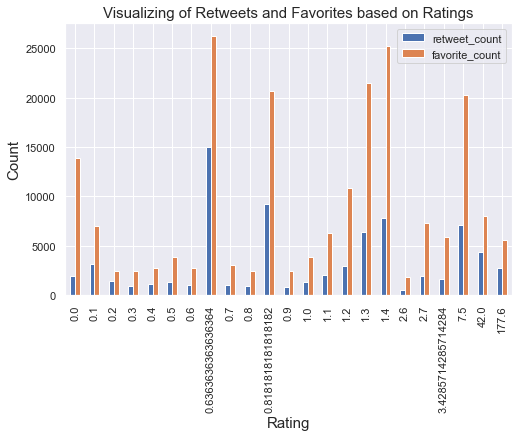

In [552]:
#Visualizing of Retweets and Favorites based on Ratings
# Set the style
sns.set(style="darkgrid")
wrangled_df.groupby('rating')['retweet_count','favorite_count'].mean().plot(kind='bar', figsize=(8,5))
plt.title('Visualizing of Retweets and Favorites based on Ratings', fontsize=15)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Count', fontsize=15)

### people tend to put like rather than retweet, The like counts are higher than the retweet counts for each rating
### The dogs with the ratings between 0.6 and 0.7 are retweeted and liked most.

Text(0.5, 0, 'Dog Stage')

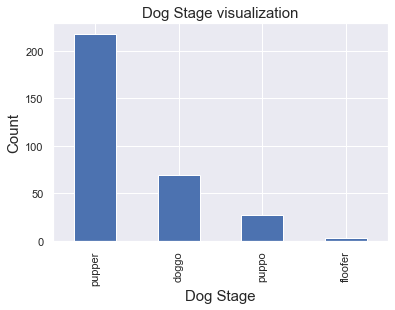

In [553]:
#Dog Stage visualization
dog_stages=wrangled_df.groupby('dog_stage').filter(lambda x: len(x) < 250)
dog_stages['dog_stage'].value_counts().plot(kind = 'bar')
plt.title('Dog Stage visualization', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Dog Stage', fontsize=15)

### pupper have the greates count number, after that doggo,  puppoes, and lowest count is for floffer
### There are 1679 dogs with unknown dog stage, which is a very high number 

Text(0, 0.5, 'Avarage Favorite Count')

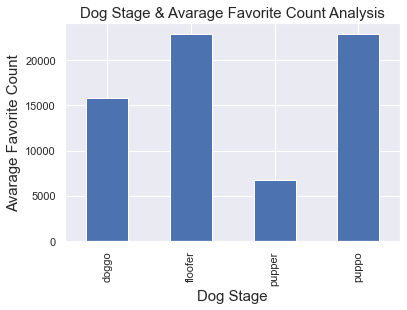

In [554]:
dog_stages.groupby('dog_stage')['favorite_count'].mean().plot(kind='bar')
plt.title('Dog Stage & Avarage Favorite Count Analysis', fontsize=15)
plt.xlabel('Dog Stage', fontsize=15)
plt.ylabel('Avarage Favorite Count', fontsize=15)

### most of likes go to floffer and puppo  dogs which they have the lowest count as we see in the previouse destribution. 
### such a small diffrences b\w puppo and floofer in this distribution. 
### also puppo and flooffer have the lowest count as we see in the previouse visualization, the reason may be that they are unique and not many people have the same so they win with more likes.
### pupperes have the lowest like count, also they have the biggest count number in the previuse visualization


Text(0, 0.5, 'Avarage rating')

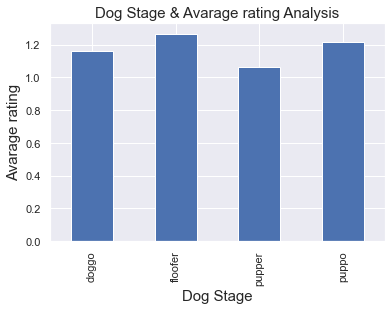

In [555]:
#Dog Stage & Avarage rating Analysis
dog_stages.groupby('dog_stage')['rating'].mean().plot(kind='bar')
plt.title('Dog Stage & Avarage rating Analysis', fontsize=15)
plt.xlabel('Dog Stage', fontsize=15)
plt.ylabel('Avarage rating', fontsize=15)

### floofer and puppo also win they have the largest number of average rating, as we said, it may be the reason that it is rare
### Pupper have the lowest number of average rating